#### **Welcome to Assignment 1 on Deep Learning for Computer Vision.**
In this assignment you will get a chance to implement basic Image processing tasks like Correlation, Convolution, Edge Detection etc.

#### **Instructions**
1. Use Python 3.x to run this notebook
3. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
4. Read documentation of each function carefully.

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib inline uncomment this line if you're running this notebook on your local PC

In [ ]:
# DO NOT CHANGE THIS CODE
np.random.seed(0)

In [ ]:
def standardize(image):
    eps = 1e-5  # some fields have all 255 so variance will be 0, to avoid division by zero, introduced eps
    return (image - np.mean(image))/(np.std(image)+eps)

In [ ]:
# Implement Linear Filtering technique on an image using a linear filter
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]

    filter_ = np.array(filter_.convert('L'))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    # YOUR CODE STARTS HERE
    for i in range(result_height):
        for j in range(result_width):
            temp = standardize(image[i:filter_height+i, j:filter_width+j]) * filter_
            try:
                result[i][j] = np.sum(temp)
            except ValueError as err:
                print("something went wrong", err)
                sys.exit()
    # YOUR CODE ENDS HERE
    return result
    

In [ ]:
# To test your implementation, run the below code.
image = Image.open('./images/car_road.jpg')
filter_ = Image.open('./images/car.jpg')
result = linear_filter(image, filter_)

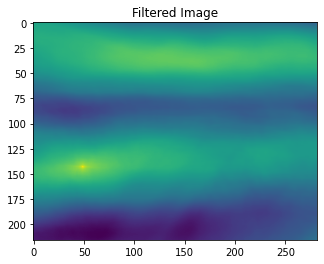

In [ ]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

In [ ]:
from numpy import unravel_index
unravel_index(result.argmax(), result.shape)

(143, 49)

### Question 1

Where do you find the bright spot in the image displayed above? (*Hint:* Find the co-ordinates of the maximum value in the output array  )

1. $(143, 49)$
2. $(134, 47)$
3. $(130, 33)$
4. $(126, 50)$

In [ ]:
# To test your implementation, run the below code.
image = Image.open('./images/hills.jpeg')
filter_ = Image.open('./images/template.png')
result = linear_filter(image, filter_)

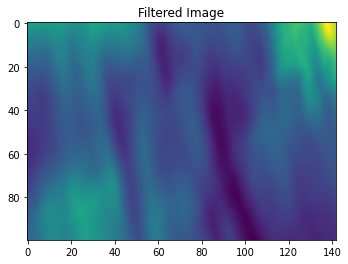

In [ ]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

In [ ]:
from numpy import unravel_index
unravel_index(result.argmax(), result.shape)

(0, 137)

### Question 2

Where do you find the bright spot in the image displayed above? (*Hint:* Find the co-ordinates of the maximum value in the output array  )

1. $(2, 130)$
2. $(25, 118)$
3. $(0, 137)$
4. $(42, 115)$

In [ ]:
# Implement Convolution on an image using a filter/kernel
def convolution2D(image, kernel):
    """
    Performs convolution on an image using a kernel.
    
    Arguments:
    image -- 2D matrix representing image.
    kernel -- kernel to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # YOUR CODE STARTS HERE
    kernel_new = filter_.transpose(Image.FLIP_TOP_BOTTOM).transpose(Image.FLIP_LEFT_RIGHT)
    result = linear_filter(image,kernel_new)
    
    # YOUR CODE ENDS HERE
    return result

In [ ]:
# To test your implementation, run the below code.
image = Image.open('./images/car_road.jpg')
filter_ = Image.open('./images/car.jpg')
result = convolution2D(image, filter_)

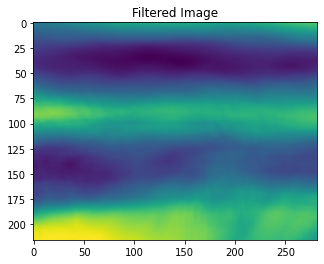

In [ ]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

In [ ]:
from numpy import unravel_index
print(unravel_index(result.argmin(), result.shape))
print(unravel_index(result.argmax(), result.shape))

(38, 142)
(215, 61)


### Question 3

What are index of the min and max values in the above image?

1. $(43, 134), (200, 54)$
2. $(38, 142), (215, 61)$
3. $(30, 118), (198, 54)$
4. $(44, 142), (220, 43)$

In [ ]:
# To test your implementation, run the below code.
image = Image.open('./images/hills.jpeg')
filter_ = Image.open('./images/template.png')
result = convolution2D(image, filter_)

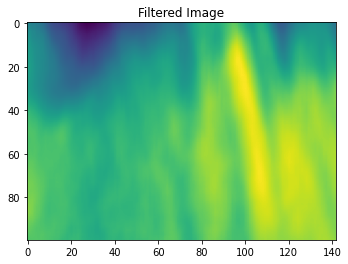

In [ ]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

In [ ]:
from numpy import unravel_index
print(unravel_index(result.argmin(), result.shape))
print(unravel_index(result.argmax(), result.shape))

(0, 27)
(22, 98)


### Question 4

What are index of the min and max values in the above image?

1. $(15, 28), (18, 89)$
2. $(0, 27), (22, 98)$
3. $(4, 17), (14, 70)$
4. $(7, 42), (10, 89)$

In [ ]:
###SOLUTION OF Question 5.

import numpy as np
from PIL import Image

image = Image.open('./images/clown.png')

###YOUR CODE STARTS HERE

# Define 3*3 Vertical sobel filter (Hint: refer lecture slides)
sobel_v = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
#Define 3*3 Horizontal sobel filter (Hint: refer lecture slides)
sobel_h = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])


#compute vertical response using convolution2D function
response_v = convolution2D(image, sobel_v) 

#compute horizontal response using convolution2D function
response_h = convolution2D(image, sobel_h)

#compute final response
G = np.abs(response_h) + np.abs(response_v)

###YOUR CODE ENDS HERE

In [ ]:
from numpy import unravel_index
print(unravel_index(G.argmin(), G.shape))
print(unravel_index(G.argmax(), G.shape))

(52, 147)
(111, 26)


### Question 5

What are index of the min and max values in the above image?

1. $(52, 147), (111, 26)$
2. $(50, 134), (100, 31)$
3. $(56, 152), (116, 18)$
4. $(51, 143), (114, 24)$

In [ ]:
###SOLUTION OF Question 6

import numpy as np
from PIL import Image

image = Image.open('./images/clown.png')

###YOUR CODE STARTS HERE

# Define 3*3 Laplace filter (Hint: refer lecture slides)
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])


#compute response using convolution2D function
response_L = convolution2D(image, laplacian_filter) 

###YOUR CODE ENDS HERE

In [ ]:
from numpy import unravel_index
print(unravel_index(response_L.argmin(), response_L.shape))
print(unravel_index(response_L.argmax(), response_L.shape))

(6, 108)
(111, 26)


### Question 6

What are index of the min and max values in the above image?

1. $(4, 117), (111, 26)$
2. $(13, 134), (100, 31)$
3. $(6, 108), (111, 26)$
4. $(10, 104), (106, 22)$